# Load a pre-trained model and try it out

In [1]:
%%javascript
IPython.notebook.clear_all_output();

<IPython.core.display.Javascript object>

Recommended readings: https://keras.io/applications/#applications

You may see models being downloaded if it is not already on your disk

In [2]:
from tensorflow.keras.applications import resnet50

model = resnet50.ResNet50(weights='imagenet') # taking input as 224 x 224 x 3 images

Instructions for updating:
Colocations handled automatically by placer.


Now download some image from Google Image to the local folder, and classify it using the loaded model

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
#filename = 'elephant.png' # set it to the name of the file you downloaded
filename = 'elephant2.jpg'

# Keras uses the PIL format for loading images.
# Thus, the image is in width x height x channels format.
original = load_img(filename, target_size=(224, 224)) # image object
print('PIL image size', original.size)


PIL image size (224, 224)


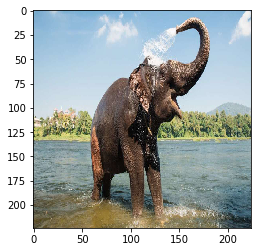

(224, 224, 3)

In [4]:
# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original) # image object -> pixel array
# print(numpy_image.dtype)
plt.imshow(np.uint8(numpy_image))
plt.show()
numpy_image.shape

image batch size (1, 224, 224, 3)


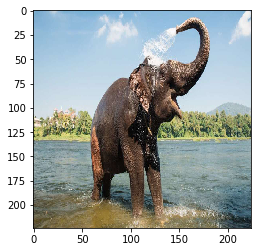

In [5]:
# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
# print(numpy_image.dtype)
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [6]:
# Preprocess the input by subtracting the mean value from each channel of the images in the batch.
# Mean is an array of three elements obtained by the average of R, G, B pixels of all images obtained from ImageNet.
# The mean values for Imagenet are: [103.939, 116.779, 123.68].
# This is done using the preprocess_input() function.
processed_image = resnet50.preprocess_input(image_batch.copy()) # need deep-copy as it will change the image_batch
(image_batch - processed_image)[0][0][0]

array([ 59.939003, 116.779   , 167.68    ], dtype=float32)

In [7]:
# get the predicted probabilities for each class
predictions = model.predict(processed_image)
predictions.shape # 1 image, 1000 classes (values are scores)

(1, 1000)

In [8]:
# convert the probabilities to class labels
# We will get the top 5 predictions which is the default
label = resnet50.decode_predictions(predictions)
#label = resnet50.decode_predictions(predictions, top=25)
label # list of (class_name, class_description, score)

[[('n02504013', 'Indian_elephant', 0.79970807),
  ('n01871265', 'tusker', 0.17438176),
  ('n02504458', 'African_elephant', 0.024420336),
  ('n02099849', 'Chesapeake_Bay_retriever', 0.0005941375),
  ('n02410509', 'bison', 7.904039e-05)]]

Note: ImageNet is based upon WordNet which groups words into sets of synonyms (synsets). Each synset is assigned a “wnid” (Wordnet ID). Note that in a general category, there can be many subcategories and each of them will belong to a different synset. For example Working Dog ( sysnet = n02103406 ), Guide Dog ( sysnet = n02109150 ), and Police Dog ( synset = n02106854 ) are three different synsets.

Now try to download **5 images**, and predict them in **one batch** using **another model** (e.g., VGG16 or InceptionV3) below.

Recommended reading: https://keras.io/applications/

In [9]:
########################################################################
# Your code here...
########################################################################


#model = resnet50.ResNet50(weights='imagenet') # taking input as 224 x 224 x 3 images
from tensorflow.keras.applications import inception_v3
model = inception_v3.InceptionV3(weights='imagenet') # taking input as 299 x 299 x 3 images

# Downloaded image file names
filenames = ['dog2.jpg', 'balloons.jpg', 'car.jpg', 'shark_clear.jpg', 'shark_distorted.jpg']
num_files = len(filenames)

# Initial array to store loaded files
x_train = np.zeros((num_files, 299, 299, 3), dtype=np.uint8)

# Load batch of files
for i in range(num_files):
    x_train[i] = load_img(filenames[i], target_size=(299, 299)) # image object
print(x_train.shape)

# Process input batch of images and predict
processed_image = inception_v3.preprocess_input(x_train.copy())
predictions = model.predict(processed_image)
predictions.shape # 5 images, 1000 classes

# Generate label from predicted probabilities
label = inception_v3.decode_predictions(predictions) 
label # list of (class_name, class_description, score)

(5, 299, 299, 3)


[[('n02106662', 'German_shepherd', 0.8722618),
  ('n02105412', 'kelpie', 0.022825923),
  ('n03598930', 'jigsaw_puzzle', 0.008280834),
  ('n02916936', 'bulletproof_vest', 0.0048851445),
  ('n02105162', 'malinois', 0.003841709)],
 [('n02782093', 'balloon', 0.9937458),
  ('n03888257', 'parachute', 0.0002513883),
  ('n03483316', 'hand_blower', 0.00018473984),
  ('n03720891', 'maraca', 0.0001086392),
  ('n02692877', 'airship', 4.4389344e-05)],
 [('n04037443', 'racer', 0.82278603),
  ('n04285008', 'sports_car', 0.07960271),
  ('n02974003', 'car_wheel', 0.021134058),
  ('n03895866', 'passenger_car', 0.0074534575),
  ('n03930630', 'pickup', 0.0055352934)],
 [('n01484850', 'great_white_shark', 0.9816611),
  ('n01491361', 'tiger_shark', 0.0010441547),
  ('n02071294', 'killer_whale', 0.0002951803),
  ('n02106382', 'Bouvier_des_Flandres', 0.00026885854),
  ('n02066245', 'grey_whale', 0.00019551352)],
 [('n01484850', 'great_white_shark', 0.9962656),
  ('n02641379', 'gar', 0.0003988769),
  ('n014913